#Predict the primary_fuel energy source used in primary electricity generation or export
#Predict the capacity_mw - electrical generating capacity in megawatts

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
#Loading the Australian power plant data 
australian_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv')
australian_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,AUS,Australia,Yarrawonga,AUS0000101,9.00,-36.0094,145.9995,Hydro,NaN,NaN,...,2019.0,38.216111,44.224722,50.183889,46.035278,31.444722,37.317778,NaN,Australia Clean Energy Regulator,NaN
508,AUS,Australia,Yarwun,AUS0000173,154.00,-23.8306,151.1519,Gas,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
509,AUS,Australia,Yuendumu,AUS0000465,0.24,-22.2426,131.7931,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,5.216667,5.176944,5.341111,NaN,Australia Clean Energy Regulator,NaN
510,AUS,Australia,Yulara,AUS0000257,10.95,-25.2323,130.9912,Gas,NaN,NaN,...,2019.0,21.947500,22.775000,24.086111,23.043889,19.885000,19.558056,NaN,Australia Clean Energy Regulator,NaN


In [62]:
#Loading the Indian power plant data 
indian_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv')
indian_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,1.92500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,2.05400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#Loading the USA power plant data 
usa_df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv')
usa_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.46700,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.21100,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.58900,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [64]:
# Display the first few rows and column information of the Australian dataset
australian_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Display the first few rows and column information of the Indian dataset
indian_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [66]:
# Display the first few rows and column information of the USA dataset
usa_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#The columns of each dataset have sames headings/names and the 3 datasets have equal number of columns (27 columns) so we can to ahead to combine 
# Combine the datasets
combined_df = pd.concat([australian_df, indian_df,usa_df], ignore_index=True)
combined_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [68]:
combined_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
combined_df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
13293,USA,United States of America,Zotos International WPGF,USA0057648,3.4,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671,2.46015,2.489,1.670,1.23349,2.630,1.211,U.S. Energy Information Administration,NaN
13294,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.0,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161,1.589,U.S. Energy Information Administration,NaN
13295,USA,United States of America,Zumbro Solar Garden,USA0063426,0.0,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13296,USA,United States of America,Zuni,USA0000478,0.0,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000,0.00000,0.000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN
13297,USA,United States of America,eBay - South Jordan,USA0059281,9.8,40.5606,-112.0478,Gas,NaN,NaN,...,2019.0,12.968,51.27600,71.505,76.392,76.63100,75.228,72.06506,U.S. Energy Information Administration,NaN


In [70]:
combined_df.shape

(13298, 27)

In [71]:
combined_df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [72]:
combined_df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                  object
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019          object
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

<Axes: >

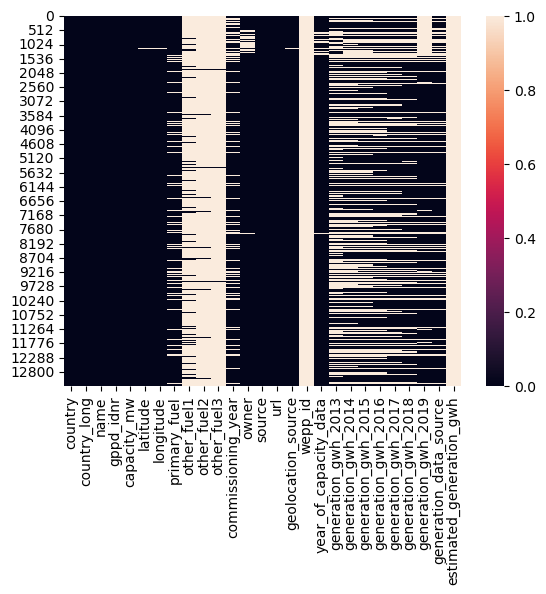

In [73]:
#checking for null values using heatmap
sns.heatmap(combined_df.isnull())

In [74]:
#checking for null and missing values
combined_df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64

In [75]:
#We have a lot of null values in the combined dataset - attempting to handle null values

# Drop columns with more than 50% missing values
threshold = len(combined_df) * 0.5
combined_df.dropna(thresh=threshold, axis=1, inplace=True)

# Fill numerical columns with mean
for col in combined_df.select_dtypes(include=['float64', 'int64']).columns:
    combined_df[col].fillna(combined_df[col].mean(), inplace=True)

# Fill categorical columns with mode
for col in combined_df.select_dtypes(include=['object']).columns:
    combined_df[col].fillna(combined_df[col].mode()[0], inplace=True)


In [76]:
#Verifying null and missing values after handling null values
combined_df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

There are no null values in the dataset

In [77]:
print ("Total Duplicate rows are: ",combined_df.duplicated().sum())

Total Duplicate rows are:  0


In [78]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   name                    13298 non-null  object 
 3   gppd_idnr               13298 non-null  object 
 4   capacity_mw             13298 non-null  float64
 5   latitude                13298 non-null  float64
 6   longitude               13298 non-null  float64
 7   primary_fuel            13298 non-null  object 
 8   commissioning_year      13298 non-null  float64
 9   owner                   13298 non-null  object 
 10  source                  13298 non-null  object 
 11  url                     13298 non-null  object 
 12  geolocation_source      13298 non-null  object 
 13  year_of_capacity_data   13298 non-null  float64
 14  generation_gwh_2013     13298 non-null

In [79]:
for i in combined_df.columns:
    print(combined_df[i].value_counts())
    print('\n')

USA    11879
IND      907
AUS      512
Name: country, dtype: int64


United States of America    11879
India                         907
Australia                     512
Name: country_long, dtype: int64


Richland                      3
Central Utility Plant         2
Gladstone                     2
Franklin Solar                2
Hunter                        2
                             ..
E F Barrett                   1
E F Oxnard Energy Facility    1
E J West                      1
E Nash PV1                    1
eBay - South Jordan           1
Name: name, Length: 13266, dtype: int64


AUS0000433    1
USA0062255    1
USA0006180    1
USA0057489    1
USA0061333    1
             ..
USA0006378    1
USA0000840    1
USA0050818    1
USA0062324    1
USA0059281    1
Name: gppd_idnr, Length: 13298, dtype: int64


0.0      2030
5.0       552
1.0       534
2.0       479
1.5       267
         ... 
772.0       1
119.1       1
251.8       1
153.9       1
596.7       1
Name: capacity_mw, Leng

In [80]:
#checking number of unique values in each column
combined_df.nunique().to_frame("No. of unique values")

,No. of unique values
country,3
country_long,3
name,13266
gppd_idnr,13298
capacity_mw,2305
latitude,12386
longitude,12734
primary_fuel,14
commissioning_year,1937
owner,5877


These are the unique values present in the dataset, we need to remove unnecessary columns

In [81]:
#Dropping Unnecessary Columns
combined_df.drop("name",axis = 1, inplace = True)
combined_df.drop("gppd_idnr",axis = 1, inplace = True)
combined_df.drop("latitude",axis = 1, inplace = True)
combined_df.drop("longitude",axis = 1, inplace = True)

In [82]:
combined_df.describe()

,capacity_mw,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13298.000000,13298.000000,13298.0,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000,13298.000000
mean,117.738717,1998.184904,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016
std,347.090703,21.497701,0.0,1490.941253,1650.744929,1665.401835,1658.531703,1672.980485,1690.531234
min,0.000000,1896.000000,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,1993.500000,2019.0,15.063500,12.718750,9.140750,6.400250,5.034250,4.088500
50%,5.500000,2000.295163,2019.0,563.383222,635.739731,423.256996,199.777000,111.768000,63.282000
75%,52.975000,2014.000000,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016
max,6809.000000,2020.000000,2019.0,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


From the statistical summary, We can observe the following

The counts of all columns are the same, there is no missing values in the dataset 
The median(50%) is less than the mean in most columns,this means that the data is skewed to the right.
There is a huge diference between 75% and max meaning there are outliers present in the dataset 
We can also notice the standard deviation,min and 25% percentile values

In [83]:
# Identify columns with mixed types (e.g., float and str)
mixed_type_columns = []
for col in combined_df.columns:
    if combined_df[col].apply(type).nunique() > 1:
        mixed_type_columns.append(col)
print(f"Columns with mixed types: {mixed_type_columns}")

Columns with mixed types: ['generation_gwh_2019']


In [84]:
combined_df.drop("generation_gwh_2019",axis = 1, inplace = True)

Univariate Analysis

USA    11879
IND      907
AUS      512
Name: country, dtype: int64


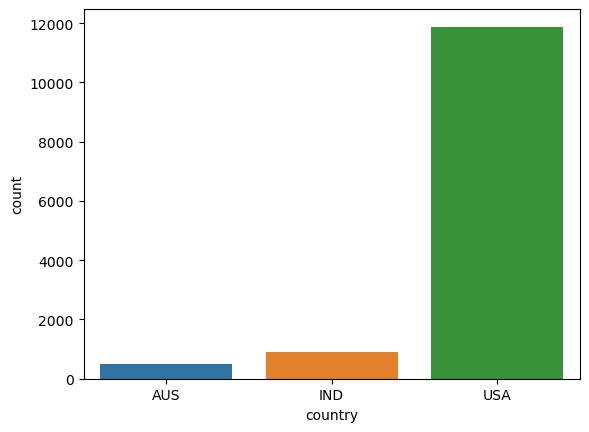

In [85]:
# Visualise the count of country
ax = sns.countplot(x="country",data = combined_df)
print(combined_df['country'].value_counts())

Solar           5484
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64


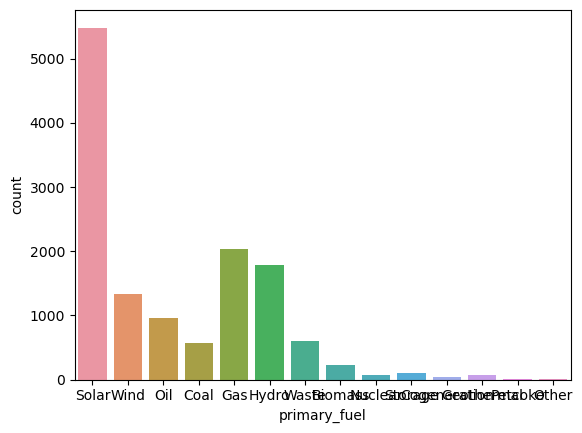

In [86]:
# Visualise the count of primary_fuel
ax = sns.countplot(x="primary_fuel",data = combined_df)
print(combined_df['primary_fuel'].value_counts())

U.S. Energy Information Administration                11856
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
National Renewable Energy Laboratory                      4
Name: geolocation_source, dtype: int64


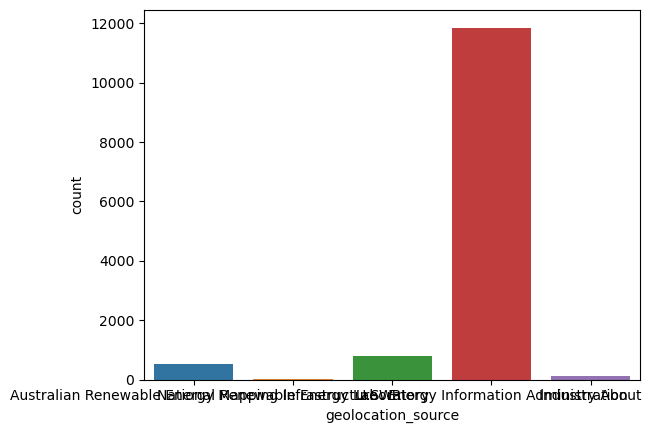

In [87]:
# Visualise the count of geolocation_source
ax = sns.countplot(x="geolocation_source",data = combined_df)
print(combined_df['geolocation_source'].value_counts())

U.S. Energy Information Administration    12532
Central Electricity Authority               454
Australia Clean Energy Regulator            312
Name: generation_data_source, dtype: int64


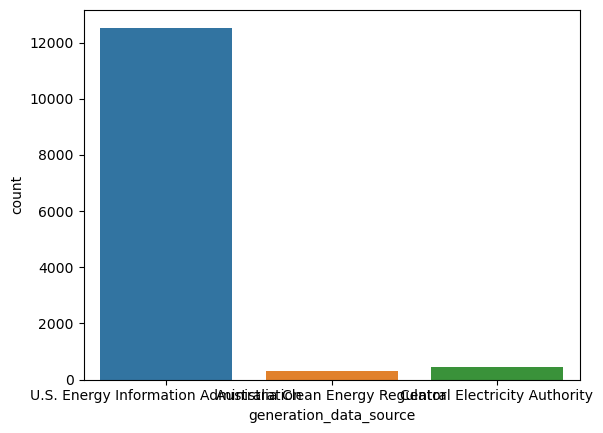

In [88]:
# Visualise the count of generation_data_source
ax = sns.countplot(x="generation_data_source",data = combined_df)
print(combined_df['generation_data_source'].value_counts())

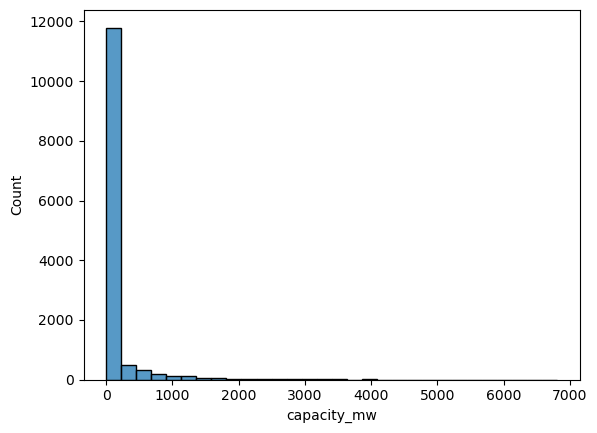

In [89]:
# Visualise the count of capacity_mw
sns.histplot(combined_df['capacity_mw'], bins=30)
plt.show()

Bivariate Analysis

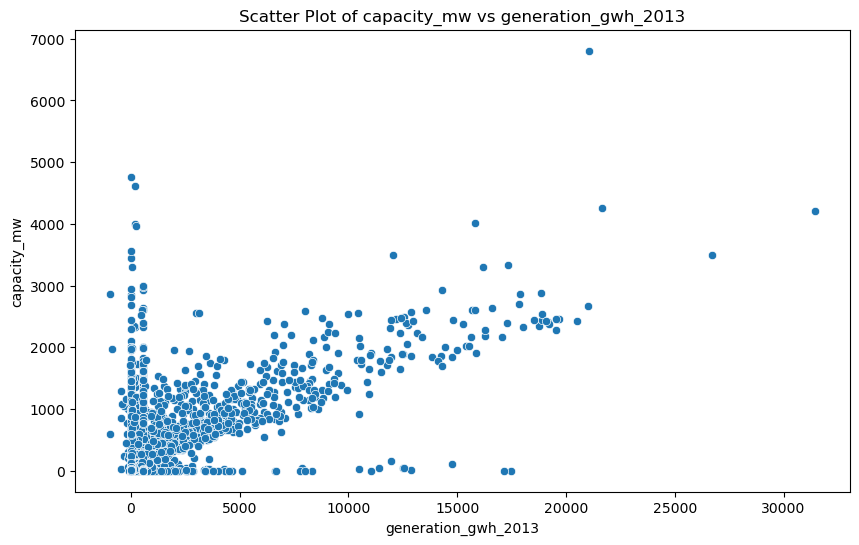

In [90]:
# Scatter plot comparing capacity_mw and generation_gwh_2013
plt.figure(figsize=(10, 6))
sns.scatterplot(x='generation_gwh_2013', y='capacity_mw', data=combined_df)
plt.title('Scatter Plot of capacity_mw vs generation_gwh_2013')
plt.xlabel('generation_gwh_2013')
plt.ylabel('capacity_mw')
plt.show()

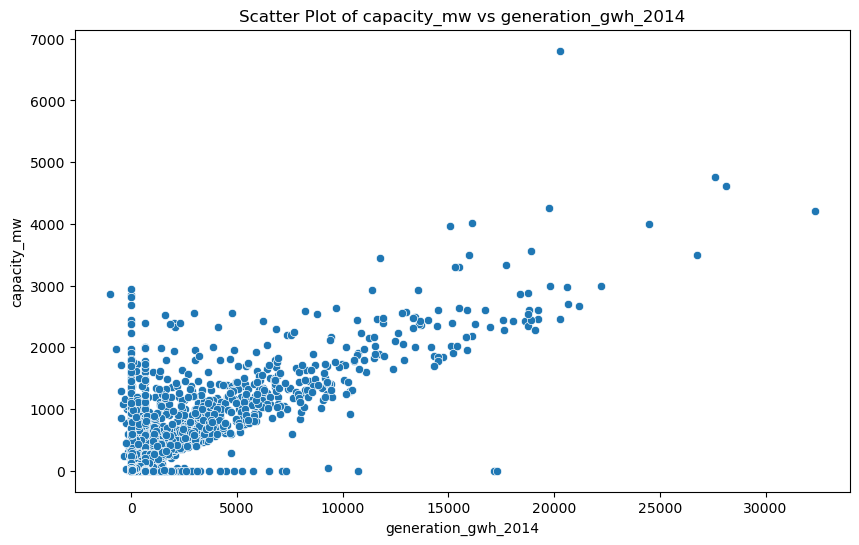

In [91]:
# Scatter plot comparing capacity_mw and generation_gwh_2014
plt.figure(figsize=(10, 6))
sns.scatterplot(x='generation_gwh_2014', y='capacity_mw', data=combined_df)
plt.title('Scatter Plot of capacity_mw vs generation_gwh_2014')
plt.xlabel('generation_gwh_2014')
plt.ylabel('capacity_mw')
plt.show()

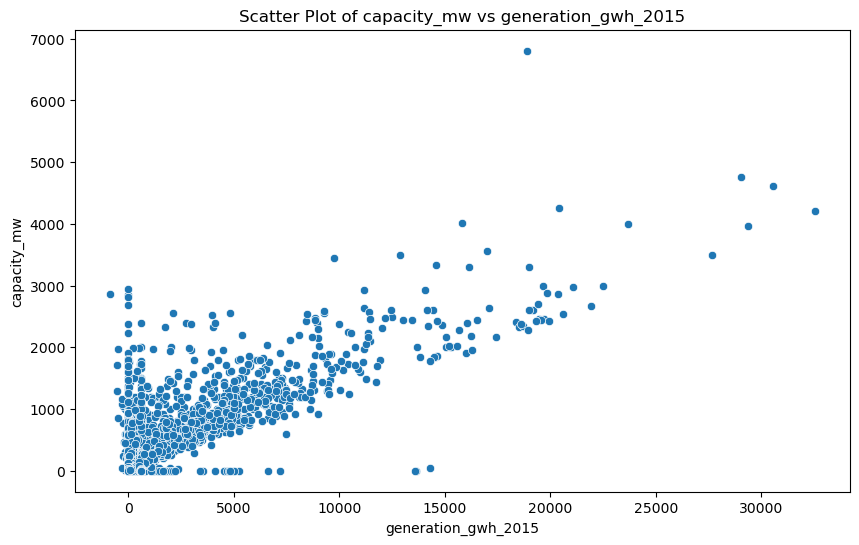

In [92]:
# Scatter plot comparing capacity_mw and generation_gwh_2015
plt.figure(figsize=(10, 6))
sns.scatterplot(x='generation_gwh_2015', y='capacity_mw', data=combined_df)
plt.title('Scatter Plot of capacity_mw vs generation_gwh_2015')
plt.xlabel('generation_gwh_2015')
plt.ylabel('capacity_mw')
plt.show()

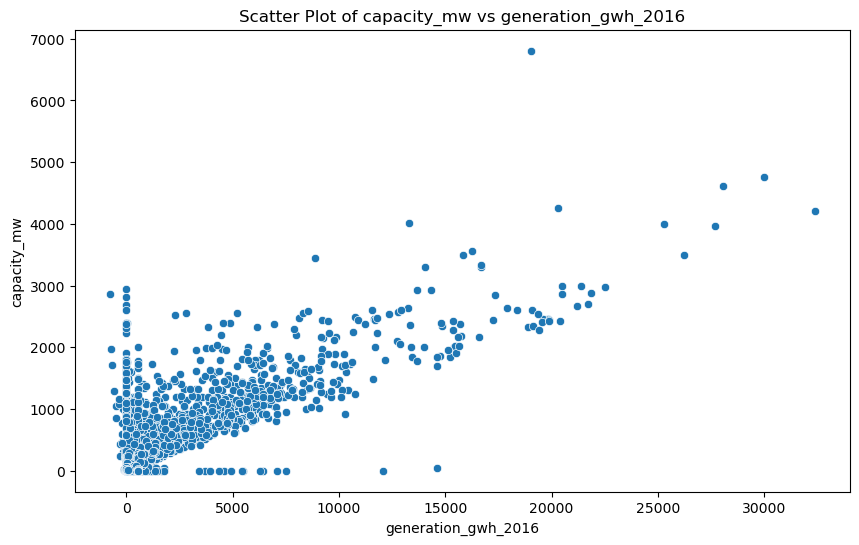

In [93]:
# Scatter plot comparing capacity_mw and generation_gwh_2016
plt.figure(figsize=(10, 6))
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw', data=combined_df)
plt.title('Scatter Plot of capacity_mw vs generation_gwh_2016')
plt.xlabel('generation_gwh_2016')
plt.ylabel('capacity_mw')
plt.show()

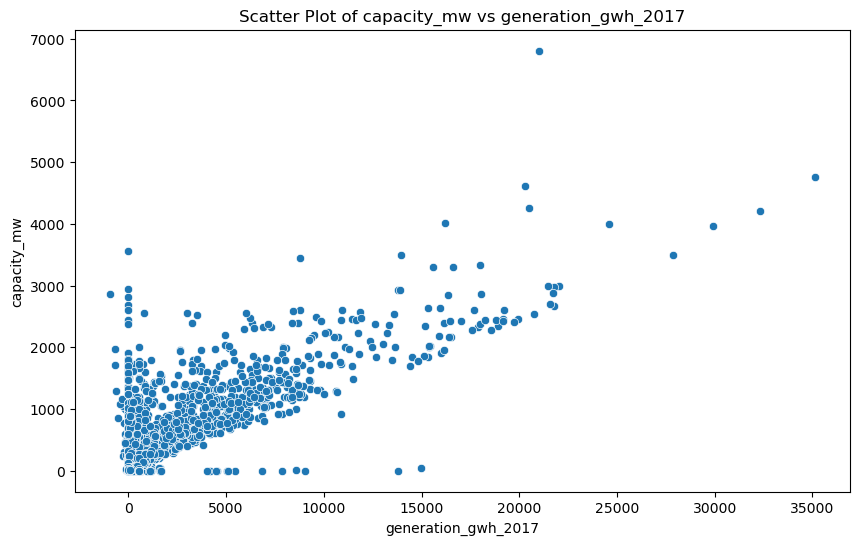

In [94]:
# Scatter plot comparing capacity_mw and generation_gwh_2017
plt.figure(figsize=(10, 6))
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw', data=combined_df)
plt.title('Scatter Plot of capacity_mw vs generation_gwh_2017')
plt.xlabel('generation_gwh_2017')
plt.ylabel('capacity_mw')
plt.show()

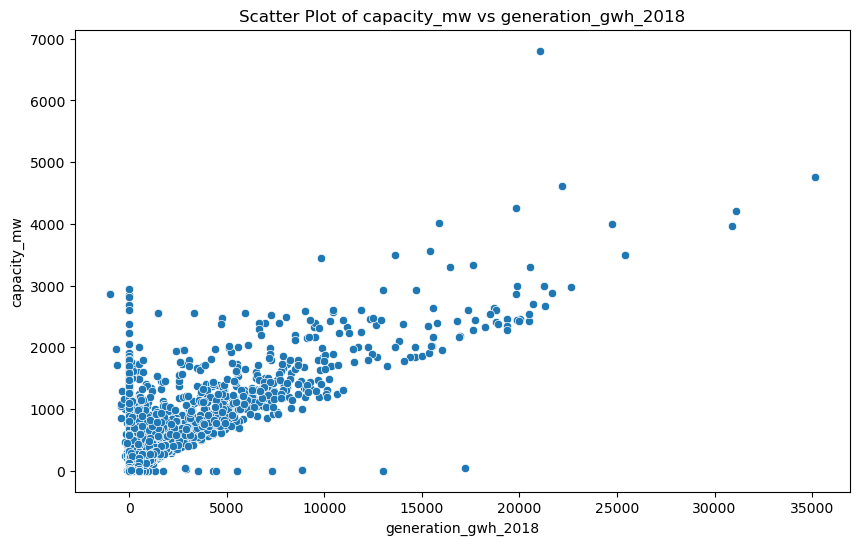

In [95]:
# Scatter plot comparing capacity_mw and generation_gwh_2018
plt.figure(figsize=(10, 6))
sns.scatterplot(x='generation_gwh_2018', y='capacity_mw', data=combined_df)
plt.title('Scatter Plot of capacity_mw vs generation_gwh_2018')
plt.xlabel('generation_gwh_2018')
plt.ylabel('capacity_mw')
plt.show()

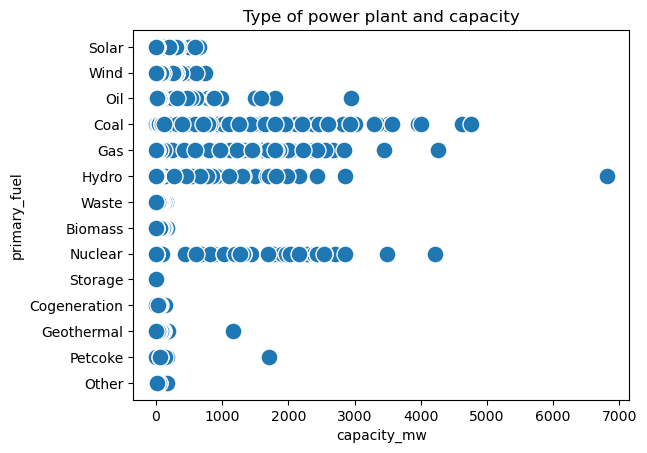

In [96]:
sns.scatterplot(x = combined_df.capacity_mw, y = combined_df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

Multivariate Analysis

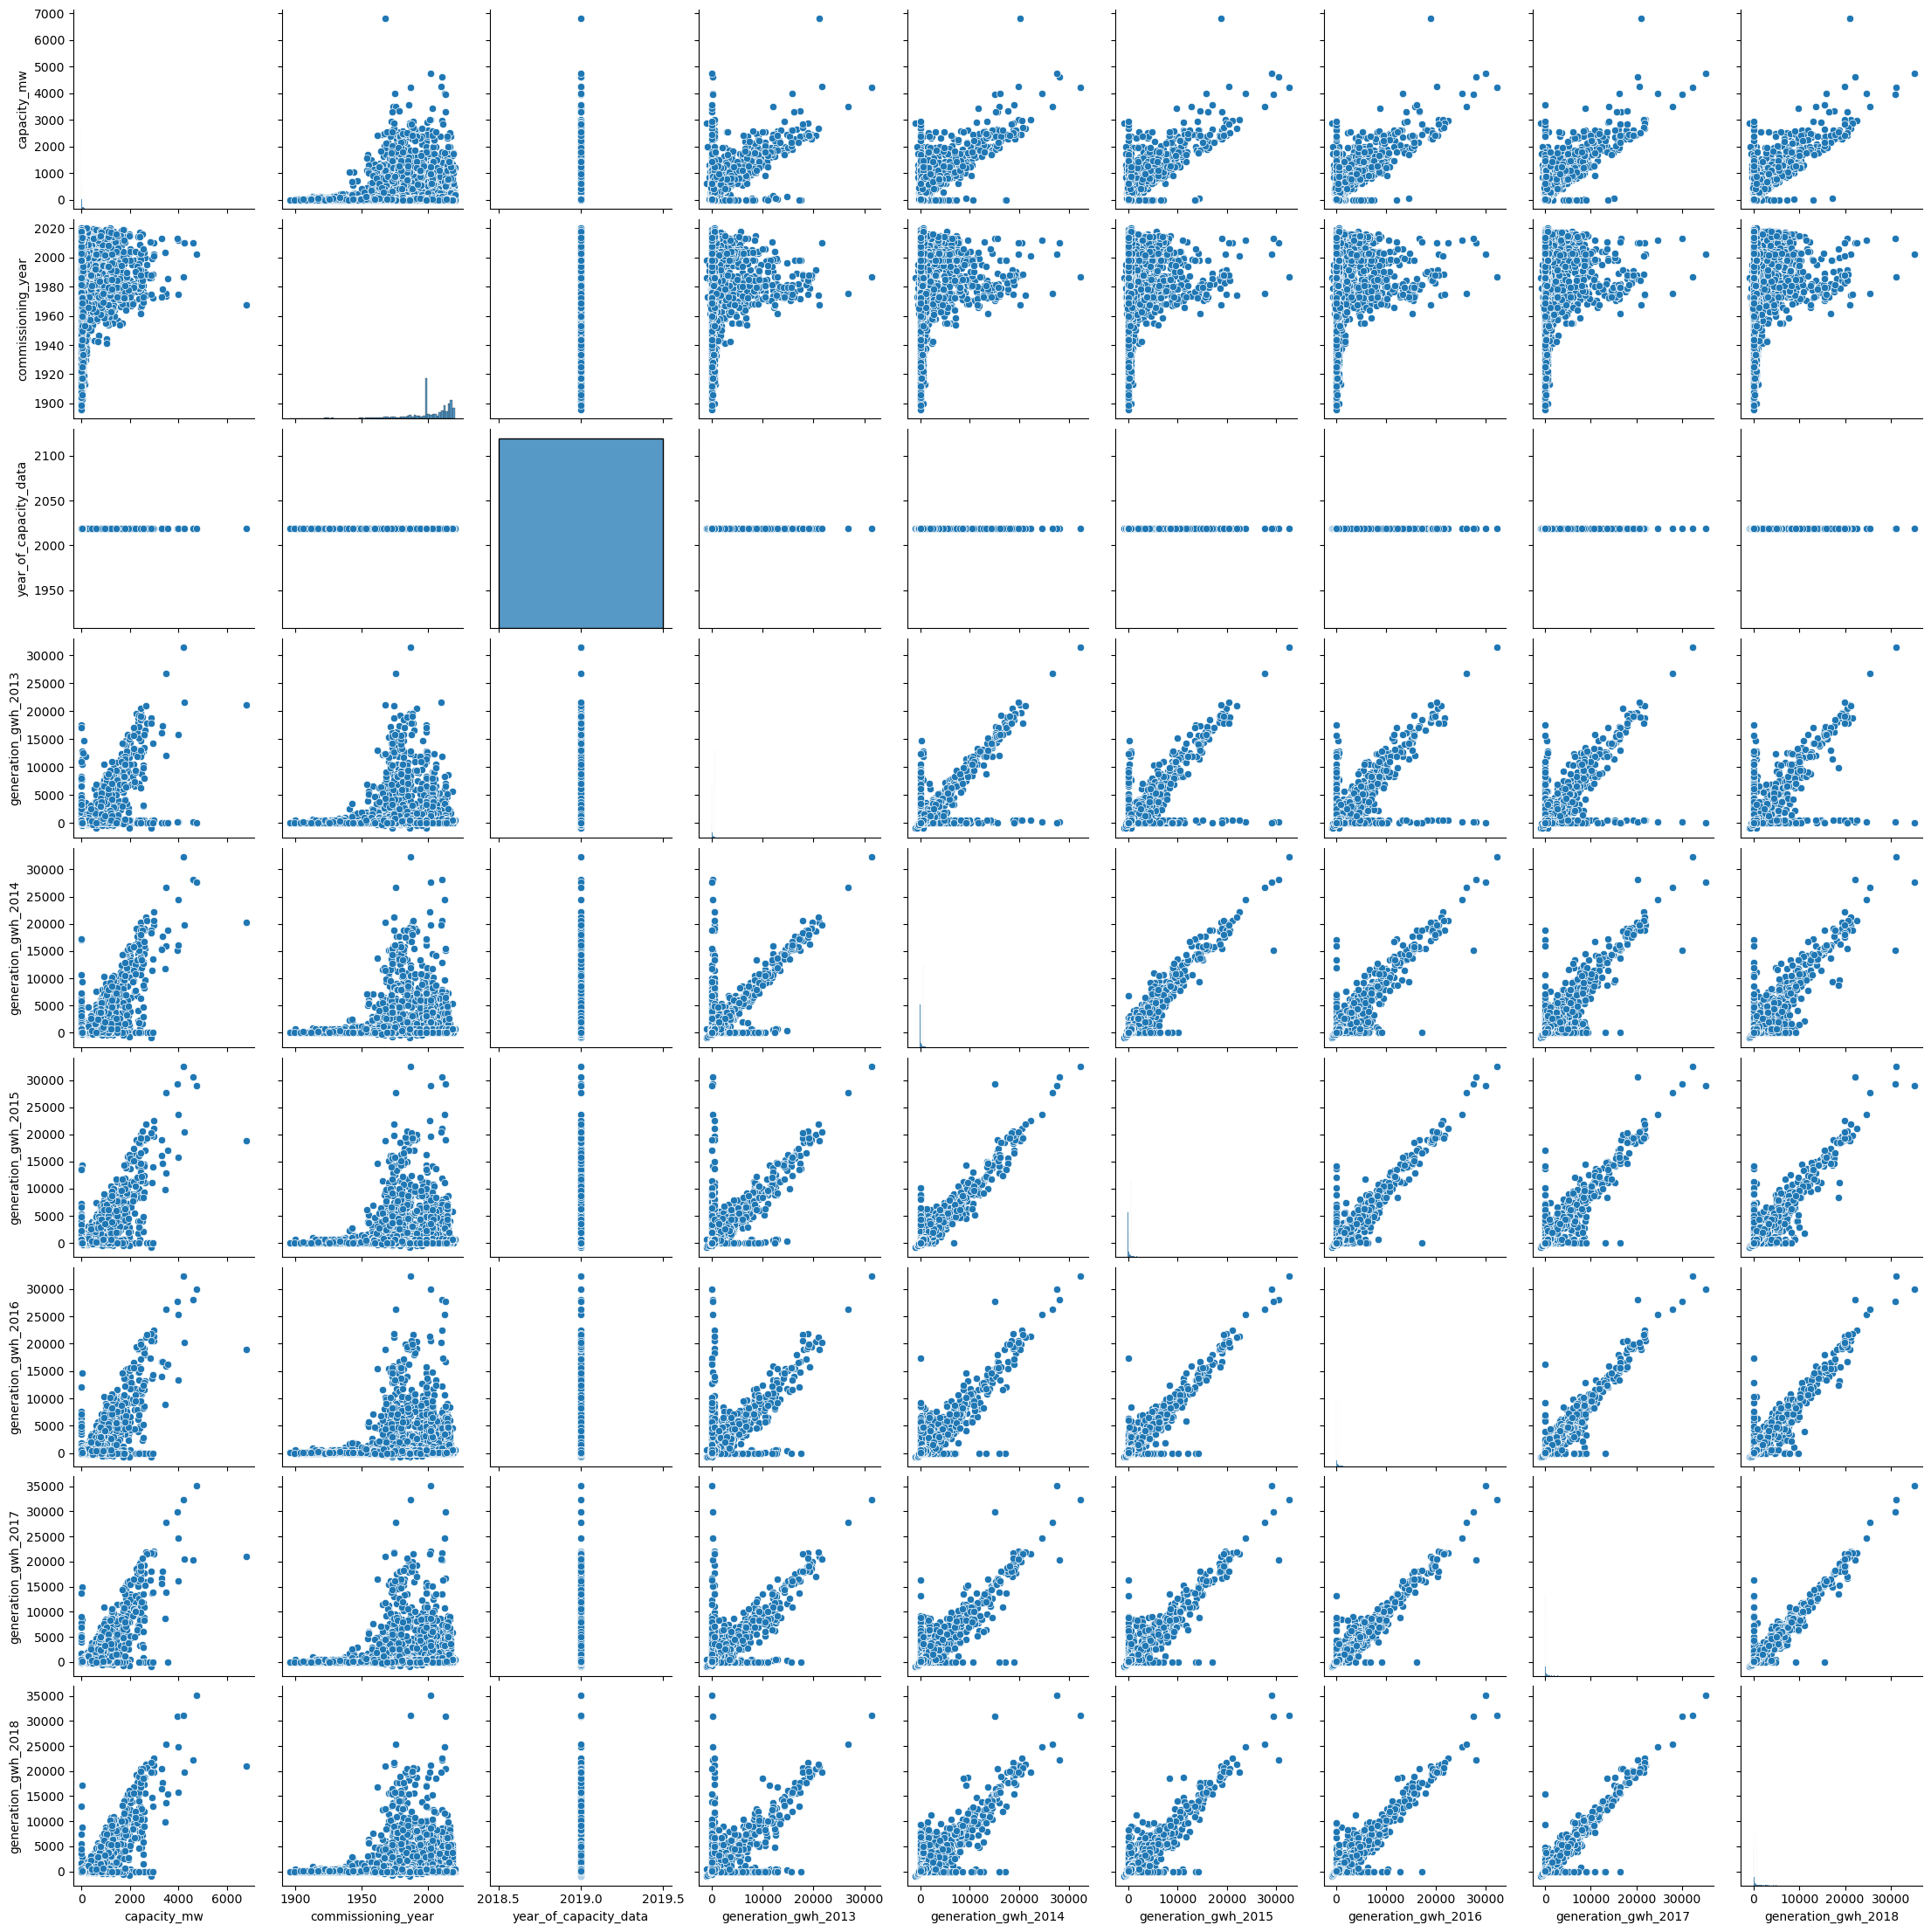

In [97]:
# Pairplot for pairwise relationships
sns.pairplot(combined_df)
plt.show()

In [98]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in combined_df.columns:
    if combined_df[i].dtypes =='object':
        combined_df[i] = OE.fit_transform(combined_df[i].values.reshape(-1,1))
combined_df

,country,country_long,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.0,0.0,0.11,10.0,2011.000000,140.0,12.0,321.0,0.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
1,0.0,0.0,1.00,10.0,1998.184904,141.0,12.0,321.0,0.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
2,0.0,0.0,21.60,13.0,1998.184904,5533.0,12.0,321.0,0.0,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0.0
3,0.0,0.0,0.24,10.0,2004.000000,203.0,12.0,321.0,0.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
4,0.0,0.0,4.00,7.0,2015.000000,1940.0,12.0,321.0,0.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,2.0,2.0,3.40,13.0,2012.000000,5872.0,185.0,68.0,3.0,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,2.0
13294,2.0,2.0,1.00,10.0,2018.000000,5874.0,185.0,68.0,3.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,1.161000,2.0
13295,2.0,2.0,0.00,10.0,1998.184904,5873.0,185.0,68.0,3.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
13296,2.0,2.0,0.00,10.0,1998.184904,4208.0,185.0,68.0,3.0,2019.0,0.000000,0.000000,0.000000,561.784508,532.472482,513.679016,2.0


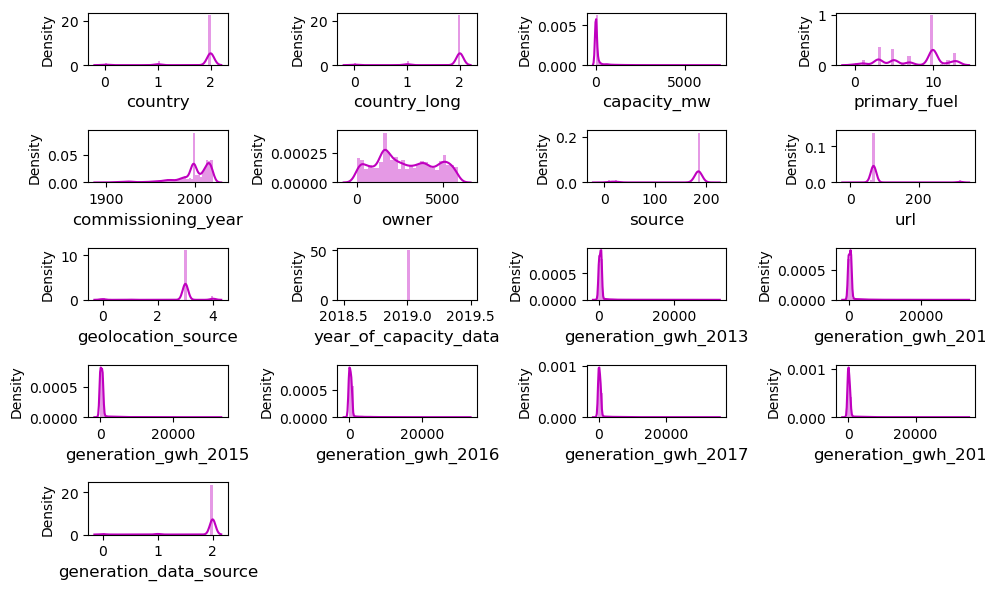

In [99]:
#To check data that have been distributed in remaining column
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in combined_df:
    if plotnumber<=23:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(combined_df[col],color = "m")
        plt.xlabel(col,fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

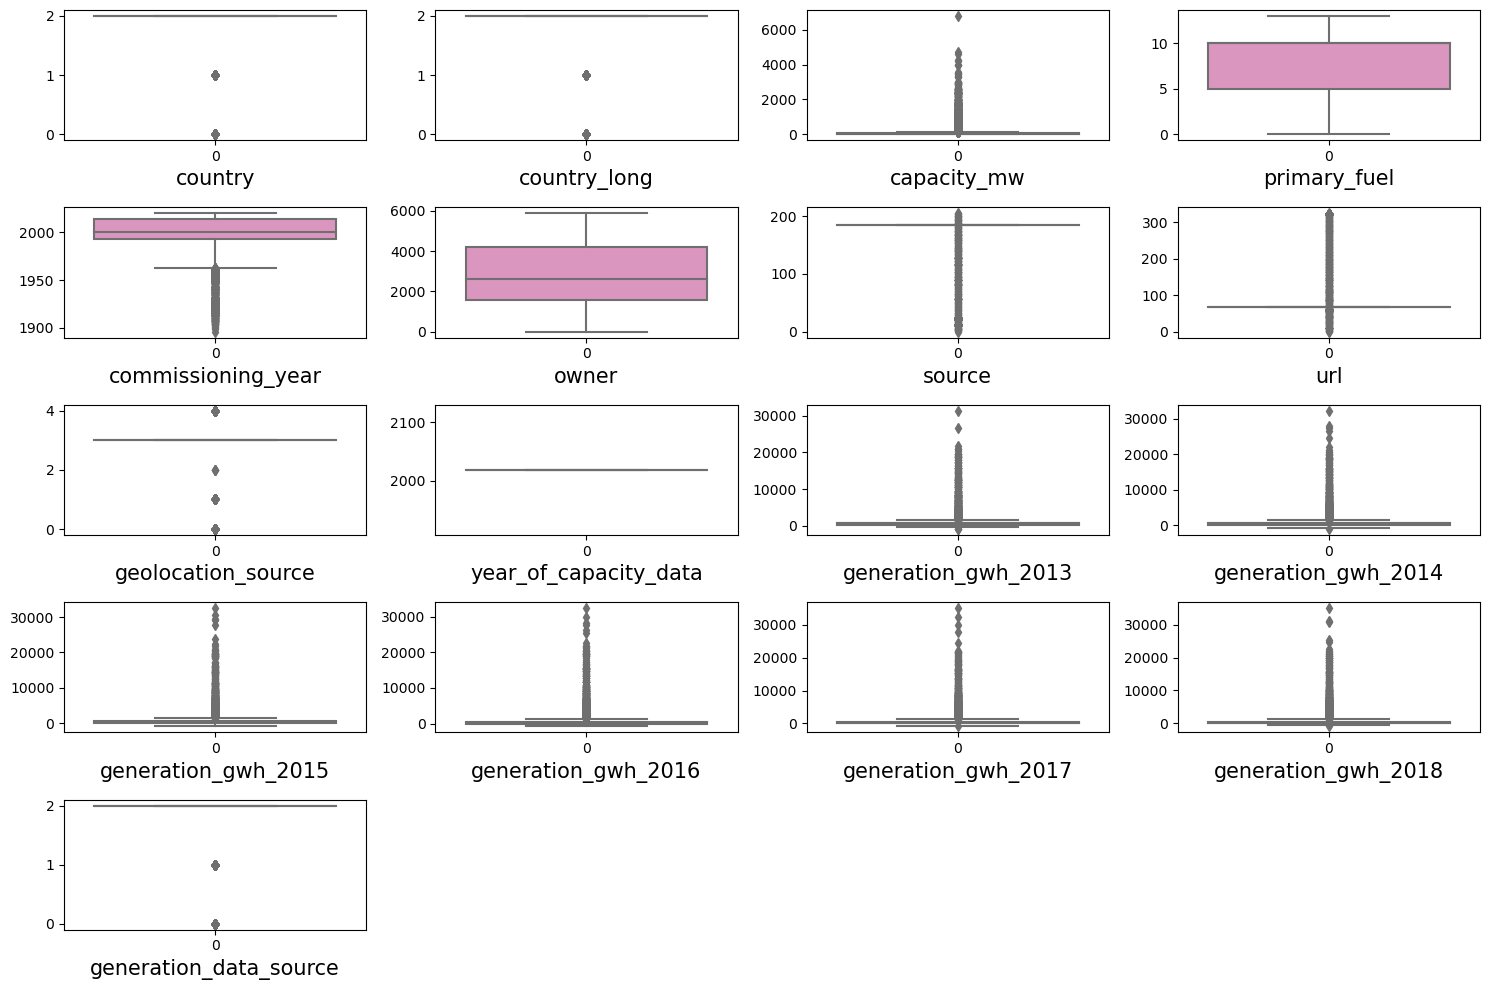

In [73]:
# checking for outliers by plotting boxplot
plt.figure(figsize = (15,10),facecolor ='white')
plotnumber = 1
for col in combined_df:
    if plotnumber<=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(combined_df[col],palette = "Set2_r")
        plt.xlabel(col,fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

Most columns have outliers so we will try to remove using zscore method

In [100]:
# Remove outliers using the zscore method
from scipy.stats import zscore
z_scores = np.abs(zscore(combined_df))
z_scores


,country,country_long,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,4.135791,4.135791,0.338912,0.598148,0.596137,1.597796,3.208385,4.543432,4.422815,NaN,0.000000,6.887261e-17,0.000000,0.000000,6.795723e-17,6.725171e-17,0.232644
1,4.135791,4.135791,0.336348,0.598148,0.000000,1.597199,3.208385,4.543432,4.422815,NaN,0.000000,6.887261e-17,0.000000,0.000000,6.795723e-17,6.725171e-17,0.232644
2,4.135791,4.135791,0.276995,1.416985,0.000000,1.623937,3.208385,4.543432,4.422815,NaN,0.317790,3.229554e-01,0.312397,0.280929,2.669421e-01,2.490416e-01,5.507054
3,4.135791,4.135791,0.338537,0.598148,0.270509,1.560161,3.208385,4.543432,4.422815,NaN,0.000000,6.887261e-17,0.000000,0.000000,6.795723e-17,6.725171e-17,0.232644
4,4.135791,4.135791,0.327704,0.220688,0.782211,0.522492,3.208385,4.543432,4.422815,NaN,0.000000,6.887261e-17,0.000000,0.000000,6.795723e-17,6.725171e-17,0.232644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,0.323787,0.323787,0.329433,1.416985,0.642655,1.826452,0.336481,0.226671,0.110335,NaN,0.375423,3.836470e-01,0.368882,0.337730,3.175524e-01,3.023122e-01,0.232644
13294,0.323787,0.323787,0.336348,0.598148,0.921766,1.827647,0.336481,0.226671,0.110335,NaN,0.000000,6.887261e-17,0.000000,0.000000,6.795723e-17,3.031812e-01,0.232644
13295,0.323787,0.323787,0.339229,0.598148,0.000000,1.827050,0.336481,0.226671,0.110335,NaN,0.000000,6.887261e-17,0.000000,0.000000,6.795723e-17,6.725171e-17,0.232644
13296,0.323787,0.323787,0.339229,0.598148,0.000000,0.832393,0.336481,0.226671,0.110335,NaN,0.377885,3.851374e-01,0.370376,0.000000,6.795723e-17,6.725171e-17,0.232644


In [101]:
# Set the threshold for what constitutes an outlier
threshold = 3

# Identify rows where any value in the row exceeds the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter the DataFrame to remove outliers
df_no_outliers = combined_df[~outliers]

# Display the cleaned DataFrame
df_no_outliers

,country,country_long,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
512,1.0,1.0,2.5,10.0,2011.000000,4771.0,116.0,136.0,2.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
513,1.0,1.0,98.0,1.0,1998.184904,5419.0,188.0,192.0,4.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
515,1.0,1.0,135.0,3.0,2004.000000,1581.0,24.0,60.0,4.0,2019.0,2.414610,617.789264,843.747000,886.004428,663.774500,626.239128,1.0
517,1.0,1.0,250.0,1.0,2005.000000,1581.0,24.0,60.0,4.0,2019.0,1.528000,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,1.0
518,1.0,1.0,60.0,5.0,1970.000000,1581.0,24.0,60.0,4.0,2019.0,5.036000,157.558250,152.195200,61.421350,89.629600,48.327150,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13293,2.0,2.0,3.4,13.0,2012.000000,5872.0,185.0,68.0,3.0,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,2.0
13294,2.0,2.0,1.0,10.0,2018.000000,5874.0,185.0,68.0,3.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,1.161000,2.0
13295,2.0,2.0,0.0,10.0,1998.184904,5873.0,185.0,68.0,3.0,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,2.0
13296,2.0,2.0,0.0,10.0,1998.184904,4208.0,185.0,68.0,3.0,2019.0,0.000000,0.000000,0.000000,561.784508,532.472482,513.679016,2.0


In [102]:
#checking for skewness
df_no_outliers.skew()


country                  -3.994448
country_long             -3.994448
capacity_mw               3.603130
primary_fuel             -0.575207
commissioning_year       -1.355057
owner                     0.128052
source                   -4.387798
url                       7.359063
geolocation_source       -1.245578
year_of_capacity_data     0.000000
generation_gwh_2013       4.081007
generation_gwh_2014       3.638661
generation_gwh_2015       3.909599
generation_gwh_2016       4.357426
generation_gwh_2017       4.431010
generation_gwh_2018       4.601000
generation_data_source   -5.654146
dtype: float64

In [103]:
#removing skewness using cuberoot method
df_no_outliers['capacity_mw'] = np.cbrt(df_no_outliers['capacity_mw'])
df_no_outliers['generation_gwh_2013'] = np.cbrt(df_no_outliers['generation_gwh_2013'])
df_no_outliers['generation_gwh_2014'] = np.cbrt(df_no_outliers['generation_gwh_2014'])
df_no_outliers['generation_gwh_2015'] = np.cbrt(df_no_outliers['generation_gwh_2015'])
df_no_outliers['generation_gwh_2016'] = np.cbrt(df_no_outliers['generation_gwh_2016'])
df_no_outliers['generation_gwh_2017'] = np.cbrt(df_no_outliers['generation_gwh_2017'])
df_no_outliers['generation_gwh_2018'] = np.cbrt(df_no_outliers['generation_gwh_2018'])


In [104]:
df_no_outliers['url'] = np.cbrt(df_no_outliers['url'])

In [105]:
#checking for skewness
df_no_outliers.skew()

country                  -3.994448
country_long             -3.994448
capacity_mw               1.301794
primary_fuel             -0.575207
commissioning_year       -1.355057
owner                     0.128052
source                   -4.387798
url                       0.000566
geolocation_source       -1.245578
year_of_capacity_data     0.000000
generation_gwh_2013      -0.323923
generation_gwh_2014      -0.238614
generation_gwh_2015      -0.078503
generation_gwh_2016       0.123456
generation_gwh_2017       0.302414
generation_gwh_2018       0.494109
generation_data_source   -5.654146
dtype: float64

In [106]:
#Checking Correlation between the target and independent variables
cor = df_no_outliers.corr()
cor

,country,country_long,capacity_mw,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
country,1.000000,1.000000,-0.209576,0.243555,0.074780,0.080250,0.897641,-0.036623,-0.391151,NaN,-0.006301,-0.164445,-0.163763,-0.183908,-0.205886,-0.221750,0.726224
country_long,1.000000,1.000000,-0.209576,0.243555,0.074780,0.080250,0.897641,-0.036623,-0.391151,NaN,-0.006301,-0.164445,-0.163763,-0.183908,-0.205886,-0.221750,0.726224
capacity_mw,-0.209576,-0.209576,1.000000,-0.416604,-0.160501,-0.019880,-0.239538,-0.034105,0.190984,NaN,0.065494,0.104828,0.136869,0.176484,0.199299,0.262239,-0.273161
primary_fuel,0.243555,0.243555,-0.416604,1.000000,0.459550,0.045366,0.246711,0.026553,-0.248442,NaN,0.186263,0.140533,0.108303,0.050401,0.021579,-0.025356,0.214110
commissioning_year,0.074780,0.074780,-0.160501,0.459550,1.000000,-0.017232,0.083073,0.005522,-0.052852,NaN,0.287633,0.251665,0.207844,0.111721,0.037399,-0.036787,0.053878
owner,0.080250,0.080250,-0.019880,0.045366,-0.017232,1.000000,0.132381,0.071189,-0.099638,NaN,0.034362,0.014879,0.012639,-0.005405,-0.001167,-0.002883,0.125658
source,0.897641,0.897641,-0.239538,0.246711,0.083073,0.132381,1.000000,0.181722,-0.577308,NaN,-0.016419,-0.154745,-0.152267,-0.171857,-0.193710,-0.209298,0.821158
url,-0.036623,-0.036623,-0.034105,0.026553,0.005522,0.071189,0.181722,1.000000,-0.174839,NaN,-0.003950,0.003872,0.006389,0.004383,0.003207,0.002248,0.161844
geolocation_source,-0.391151,-0.391151,0.190984,-0.248442,-0.052852,-0.099638,-0.577308,-0.174839,1.000000,NaN,0.015636,0.069931,0.066084,0.073992,0.085566,0.094000,-0.579905
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


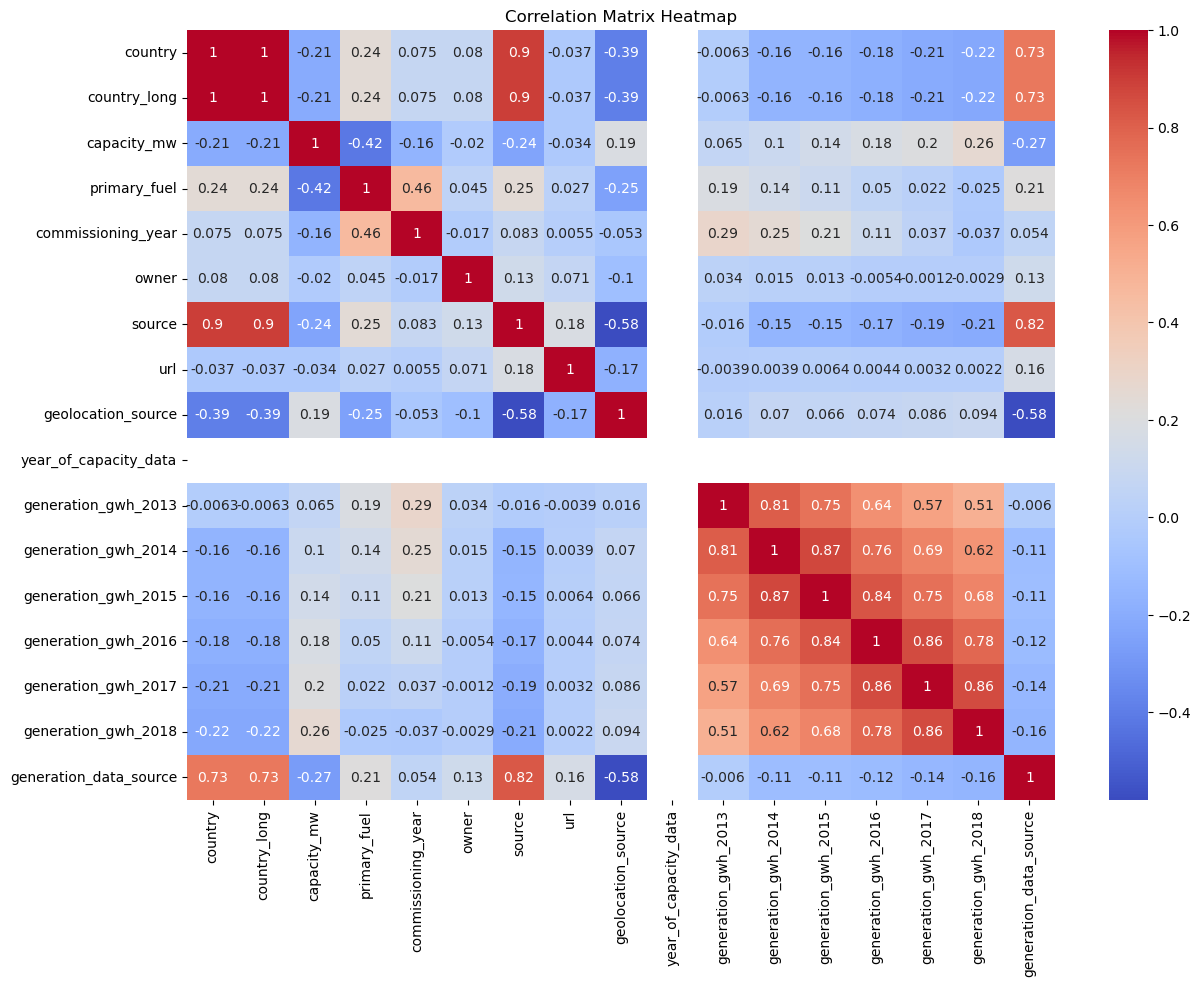

In [107]:
# Visualize the correlation matrix between the dependent and independent variables using a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

Model Building
Using machine learning algorithms to build models for predicting "Primary Fuel" and "capacity_mw".

Predicting Primary Fuel (Classification Problem)

In [130]:
#importing the necessary libraries
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder

In [109]:
# Features and target variable
X = df_no_outliers.drop(columns=['primary_fuel'])
y = df_no_outliers['primary_fuel']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Model Training

In [115]:
# Train Random Forest model
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest
Accuracy: 0.8259023354564756
              precision    recall  f1-score   support

         0.0       0.69      0.22      0.33        41
         1.0       0.68      0.58      0.63        69
         2.0       0.00      0.00      0.00         5
         3.0       0.67      0.65      0.66       346
         4.0       0.67      0.13      0.22        15
         5.0       0.77      0.83      0.80       245
         6.0       0.00      0.00      0.00         2
         7.0       0.73      0.73      0.73       189
         8.0       0.00      0.00      0.00         1
        10.0       0.92      0.99      0.95      1101
        11.0       0.88      0.67      0.76        21
        12.0       0.65      0.59      0.62       101
        13.0       0.80      0.77      0.79       219

    accuracy                           0.83      2355
   macro avg       0.57      0.47      0.50      2355
weighted avg       0.82      0.83      0.82      2355



In [114]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression
Accuracy: 0.516348195329087
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        41
         1.0       0.00      0.00      0.00        69
         2.0       0.00      0.00      0.00         5
         3.0       0.32      0.14      0.19       346
         4.0       0.00      0.00      0.00        15
         5.0       0.50      0.36      0.41       245
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00       189
         8.0       0.00      0.00      0.00         1
        10.0       0.53      0.98      0.69      1101
        11.0       0.00      0.00      0.00        21
        12.0       0.00      0.00      0.00       101
        13.0       0.00      0.00      0.00       219

    accuracy                           0.52      2355
   macro avg       0.10      0.11      0.10      2355
weighted avg       0.35      0.52      0.39      2355



In [121]:
from sklearn.tree import DecisionTreeClassifier

# Define a Decision Tree Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


# Evaluate the model
print("DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


DecisionTreeClassifier
Accuracy: 0.7613588110403398
              precision    recall  f1-score   support

         0.0       0.37      0.37      0.37        41
         1.0       0.56      0.55      0.55        69
         2.0       0.10      0.20      0.13         5
         3.0       0.62      0.60      0.61       346
         4.0       0.09      0.07      0.08        15
         5.0       0.73      0.69      0.71       245
         6.0       0.00      0.00      0.00         2
         7.0       0.68      0.62      0.65       189
         8.0       0.00      0.00      0.00         1
         9.0       0.00      0.00      0.00         0
        10.0       0.93      0.94      0.93      1101
        11.0       0.68      0.62      0.65        21
        12.0       0.46      0.46      0.46       101
        13.0       0.62      0.70      0.66       219

    accuracy                           0.76      2355
   macro avg       0.42      0.42      0.41      2355
weighted avg       0.76     

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting
Accuracy: 0.8157112526539279
              precision    recall  f1-score   support

         0.0       0.67      0.29      0.41        41
         1.0       0.64      0.55      0.59        69
         2.0       0.00      0.00      0.00         5
         3.0       0.67      0.63      0.65       346
         4.0       0.71      0.33      0.45        15
         5.0       0.79      0.81      0.80       245
         6.0       0.00      0.00      0.00         2
         7.0       0.74      0.69      0.71       189
         8.0       0.00      0.00      0.00         1
        10.0       0.90      0.98      0.94      1101
        11.0       0.86      0.57      0.69        21
        12.0       0.68      0.58      0.63       101
        13.0       0.77      0.75      0.76       219

    accuracy                           0.82      2355
   macro avg       0.57      0.48      0.51      2355
weighted avg       0.81      0.82      0.81      2355



In [117]:
from sklearn.svm import SVC

# Train SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



Support Vector Machine
Accuracy: 0.467515923566879
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        41
         1.0       0.00      0.00      0.00        69
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00       346
         4.0       0.00      0.00      0.00        15
         5.0       0.00      0.00      0.00       245
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00       189
         8.0       0.00      0.00      0.00         1
        10.0       0.47      1.00      0.64      1101
        11.0       0.00      0.00      0.00        21
        12.0       0.00      0.00      0.00       101
        13.0       0.00      0.00      0.00       219

    accuracy                           0.47      2355
   macro avg       0.04      0.08      0.05      2355
weighted avg       0.22      0.47      0.30      2355



In [119]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network model
mlp_clf = MLPClassifier(max_iter=1000)
mlp_clf.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_clf.predict(X_test)

# Evaluate the model
print("Neural Network")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print(classification_report(y_test, y_pred_mlp))


Neural Network
Accuracy: 0.5613588110403397
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        41
         1.0       0.41      0.22      0.28        69
         2.0       0.00      0.00      0.00         5
         3.0       0.37      0.54      0.44       346
         4.0       0.00      0.00      0.00        15
         5.0       0.50      0.00      0.01       245
         6.0       0.00      0.00      0.00         2
         7.0       0.39      0.50      0.44       189
         8.0       0.00      0.00      0.00         1
        10.0       0.85      0.78      0.82      1101
        11.0       0.00      0.00      0.00        21
        12.0       0.00      0.00      0.00       101
        13.0       0.29      0.74      0.42       219

    accuracy                           0.56      2355
   macro avg       0.22      0.21      0.18      2355
weighted avg       0.57      0.56      0.53      2355



In [123]:
# Accuracy Scores Cross Validation
from sklearn.metrics import classification_report, accuracy_score

models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "SVM": svm_clf,
    "Neural Network": mlp_clf
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("="*60)


Model: Logistic Regression
Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        41
         1.0       0.00      0.00      0.00        69
         2.0       0.00      0.00      0.00         5
         3.0       0.32      0.14      0.19       346
         4.0       0.00      0.00      0.00        15
         5.0       0.50      0.36      0.41       245
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00       189
         8.0       0.00      0.00      0.00         1
        10.0       0.53      0.98      0.69      1101
        11.0       0.00      0.00      0.00        21
        12.0       0.00      0.00      0.00       101
        13.0       0.00      0.00      0.00       219

    accuracy                           0.52      2355
   macro avg       0.10      0.11      0.10      2355
weighted avg       0.35      0.52      0.39      2355

Model: Random 

In [124]:
from sklearn.model_selection import cross_val_score

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean CV Accuracy: {scores.mean():.2f}")
    print("="*60)


Model: Logistic Regression
Cross-Validation Accuracy Scores: [0.48089172 0.485138   0.47158789 0.47158789 0.47530536]
Mean CV Accuracy: 0.48
Model: Random Forest
Cross-Validation Accuracy Scores: [0.82271762 0.81422505 0.81837493 0.81359533 0.81359533]
Mean CV Accuracy: 0.82
Model: Gradient Boosting
Cross-Validation Accuracy Scores: [0.81104034 0.79936306 0.79500797 0.7960701  0.80934679]
Mean CV Accuracy: 0.80
Model: SVM
Cross-Validation Accuracy Scores: [0.45541401 0.45541401 0.45565587 0.45618694 0.45618694]
Mean CV Accuracy: 0.46
Model: Neural Network
Cross-Validation Accuracy Scores: [0.54193206 0.47558386 0.40839087 0.55124801 0.48380244]
Mean CV Accuracy: 0.49


Random Forest model has the highest accuracy score and will be considered the best model based on accuracy alone

Hyperparameter Tuning on the best model Random Forest Classifier

In [126]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest
Accuracy: 0.824203821656051
              precision    recall  f1-score   support

         0.0       0.64      0.22      0.33        41
         1.0       0.68      0.57      0.62        69
         2.0       0.00      0.00      0.00         5
         3.0       0.68      0.65      0.67       346
         4.0       0.40      0.13      0.20        15
         5.0       0.78      0.81      0.79       245
         6.0       0.00      0.00      0.00         2
         7.0       0.72      0.72      0.72       189
         8.0       0.00      0.00      0.00         1
        10.0       0.92      0.99      0.95      1101
        11.0       0.93      0.62      0.74        21
        12.0       0.62      0.57      0.59       101
        13.0       0.81      0.78      0.79       219

    accuracy              

Predicting Capacity (Regression Problem)

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df_no_outliers.drop(columns=['capacity_mw'])
y = df_no_outliers['capacity_mw']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [131]:
from sklearn.linear_model import LinearRegression

# Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate the model
print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lin_reg))
print("MSE:", mean_squared_error(y_test, y_pred_lin_reg))
print("RMSE:", mean_squared_error(y_test, y_pred_lin_reg, squared=False))
print("R^2:", r2_score(y_test, y_pred_lin_reg))
print("="*60)


Linear Regression
MAE: 1.4665164914764368
MSE: 3.696684585464565
RMSE: 1.9226764120528876
R^2: 0.29084563797397833


In [132]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the model
print("Ridge Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("R^2:", r2_score(y_test, y_pred_ridge))
print("="*60)


Ridge Regression
MAE: 1.4668333283213086
MSE: 3.6971982630046476
RMSE: 1.9228099913940138
R^2: 0.2907470965215492


In [133]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model
print("Lasso Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("R^2:", r2_score(y_test, y_pred_lasso))
print("="*60)


Lasso Regression
MAE: 1.5341148586712425
MSE: 4.040466966621549
RMSE: 2.0100912831564512
R^2: 0.2248960635515963


In [134]:
from sklearn.tree import DecisionTreeRegressor

# Train Decision Tree model
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("RMSE:", mean_squared_error(y_test, y_pred_tree, squared=False))
print("R^2:", r2_score(y_test, y_pred_tree))
print("="*60)


Decision Tree Regressor
MAE: 0.5752010087831717
MSE: 1.4733842087797044
RMSE: 1.213830387154525
R^2: 0.7173529917308111


In [135]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
print("Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("R^2:", r2_score(y_test, y_pred_rf))
print("="*60)


Random Forest Regressor
MAE: 0.4099521715586001
MSE: 0.6629394168174652
RMSE: 0.8142109166656175
R^2: 0.8728248601345004


In [136]:
from sklearn.ensemble import GradientBoostingRegressor

# Train Gradient Boosting model
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("RMSE:", mean_squared_error(y_test, y_pred_gb, squared=False))
print("R^2:", r2_score(y_test, y_pred_gb))
print("="*60)


Gradient Boosting Regressor
MAE: 0.5531513454948208
MSE: 0.8103485777565328
RMSE: 0.900193633479227
R^2: 0.844546588871225


In [139]:
from sklearn.svm import SVR

# Train SVR model
svr_reg = SVR()
svr_reg.fit(X_train, y_train)

# Make predictions
y_pred_svr = svr_reg.predict(X_test)

# Evaluate the model
print("Support Vector Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("R^2:", r2_score(y_test, y_pred_svr))
print("="*60)



Support Vector Regressor
MAE: 1.5906252174695508
MSE: 5.528176037130431
RMSE: 2.351207357323133
R^2: -0.06049895795643079


The Best Model is RandomForestRegressor because it has MSE: 0.6629394168174652 and R²: 0.8728248601345004, which is the lowest MSE and the highest R² among the models trained, making it the best performing model among the ones tested.

Hyperparameter Tuning on the best model Random Forest Regressor

In [140]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Evaluate the best model on the test set
y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("MSE:", mean_squared_error(y_test, y_pred_best_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_best_rf, squared=False))
print("R^2:", r2_score(y_test, y_pred_best_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Tuned Random Forest Regressor
MAE: 0.41306032123631076
MSE: 0.6560642708206941
RMSE: 0.8099779446507751
R^2: 0.874143755393335
